# Post-process of the constrained runs

In [1]:
import sys
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib as mpl

In [2]:
# mce is available in https://github.com/tsutsui1872/mce 
sys.path.append('../mce')

In [3]:
from src.tlm import ebm_to_irm
from src.util import RetrieveGitHub
from src.plot import MyPlot # depends on mce module

In [5]:
owner = 'IPCC-WG1'
repo = 'Chapter-4_Figure4.11'
repo_ch4 = RetrieveGitHub(owner, repo, './datain')

In [6]:
myplt = MyPlot()

## Results from the constrained runs

In [24]:
# Output of 080_constrained_runs.ipynb
ncf_hist = Dataset('./dataout/constrained_run_hist.nc')
ncf_ssps = Dataset('./dataout/constrained_run_ssps.nc')

In [25]:
# Historical run period
year_hist = pd.Index(ncf_hist.variables['Year'][:])
year_hist

Int64Index([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
            ...
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', length=165)

In [26]:
# SSP scenarios run period
year_ssps = pd.Index(ncf_ssps.variables['Year'][:])
year_ssps

Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
            2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
            2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
            2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
            2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
            2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
            2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
            2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100],
           dtype='int64')

In [27]:
# Data structure of the scenario run results
nsize = ncf_ssps.dimensions['Member'].size
method_order = ncf_ssps.variables['Method'][:].tolist()
scenario_order = ncf_ssps.variables['Scenario'][:].tolist()
nsize, method_order, scenario_order

(600,
 ['ar6', 'ar6_orig', 'mce-2l', 's21'],
 ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585'])

In [28]:
# for presentation
method_case_order = ['ar6_orig', 'ar6', 's21', 'mce-2l']

In [29]:
# Make sure that the structure is the same as that of the historical run results
(
    method_order == ncf_hist.variables['Method'][:].tolist(),
    nsize == ncf_hist.dimensions['Member'].size,
)

(True, True)

In [30]:
# GSAT changes in the reference period of 1995-2014
slc_base = slice(
    year_hist.get_loc(1995),
    year_hist.get_loc(2014),
)
gsat_base = ncf_hist.variables['tg'][:, :, slc_base].mean(axis=2)

# GSAT changes relative to 1995-2014
mi = pd.MultiIndex.from_product([
    method_order, scenario_order, year_ssps,
])
df_gsat = pd.DataFrame(
    (ncf_ssps.variables['tg'][:] - gsat_base.reshape(gsat_base.shape + (1, 1)))
    .reshape((nsize, -1)),
    columns=mi,
)
df_gsat

ar6                                                              \
       ssp119                                                               
         2015      2016      2017      2018      2019      2020      2021   
0    0.384517  0.417216  0.445473  0.471609  0.496946  0.522849  0.550750   
1    0.264265  0.285875  0.304533  0.322403  0.340376  0.359075  0.379399   
2    0.241267  0.262994  0.281561  0.298953  0.316585  0.335534  0.356187   
3    0.225510  0.242513  0.256201  0.269206  0.282450  0.296622  0.313016   
4    0.241603  0.259911  0.274263  0.288156  0.303199  0.320483  0.340937   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.239014  0.258745  0.275501  0.291629  0.308064  0.325641  0.344773   
596  0.253318  0.271612  0.285976  0.299255  0.312171  0.325533  0.340919   
597  0.243141  0.261526  0.275274  0.288086  0.301589  0.317048  0.336306   
598  0.260708  0.286410  0.308209  0.328815  0.350059  0.373529  0.400010   
599  0.256569  0.273769  0.283637  0.294363  0.309086  0.329788  0.358365   

                                   ...       s21                      \
                                   ...    ssp585                       
         2022      2023      2024  ...      2091      2092      2093   
0    0.581165  0.612534  0.642673  ...  3.030609  3.073288  3.114970   
1    0.401521  0.423801  0.444264  ...  2.143435  2.176438  2.208388   
2    0.378016  0.399083  0.417626  ...  3.112191  3.156173  3.199204   
3    0.332061  0.351929  0.370400  ...  3.463573  3.514658  3.564705   
4    0.364423  0.388899  0.411995  ...  3.820508  3.878896  3.936594   
..        ...       ...       ...  ...       ...       ...       ...   
595  0.364991  0.384263  0.400691  ...  3.536267  3.583210  3.629378   
596  0.358780  0.376862  0.392538  ...  3.196724  3.241969  3.286243   
597  0.359839  0.384960  0.408553  ...  3.921211  3.984368  4.046489   
598  0.429109  0.458882  0.487221  ...  3.915085  3.973871  4.031733   
599  0.394203  0.432531  0.468372  ...  3.075997  3.125840  3.174143   

                                                                           
                                                                           
         2094      2095      2096      2097      2098      2099      2100  
0    3.153724  3.189878  3.223997  3.256949  3.289499  3.322386  3.356657  
1    2.237038  2.262871  2.286605  2.309301  2.331849  2.355102  2.380256  
2    3.239464  3.277275  3.313174  3.347986  3.382434  3.417217  3.453319  
3    3.611693  3.655959  3.698087  3.738978  3.779430  3.820212  3.862417  
4    3.991532  4.043895  4.094161  4.143156  4.191665  4.240474  4.290719  
..        ...       ...       ...       ...       ...       ...       ...  
595  3.673879  3.716880  3.758656  3.799623  3.840154  3.880602  3.921466  
596  3.327776  3.366860  3.404005  3.440004  3.475563  3.511363  3.548370  
597  4.104705  4.159441  4.211484  4.262077  4.312327  4.363314  4.416578  
598  4.086139  4.137392  4.186141  4.233448  4.280287  4.327622  4.376833  
599  3.217742  3.257475  3.294450  3.330224  3.366050  3.403114  3.443071  

[600 rows x 1720 columns]

In [31]:
# ERF in 1995-2014
df_erf_1995to2014 = pd.concat({
    name:
    pd.DataFrame(
        ncf_hist.variables[name][:, :, slc_base].mean(axis=2),
        columns=method_order,
    )
    for name in ['erf', 'erf_co2']
}, axis=1)

In [32]:
# ERF in 2081-2100
slc = slice(
    year_ssps.get_loc(2081),
    year_ssps.get_loc(2100),
)
mi = pd.MultiIndex.from_product([method_order, scenario_order])
df_erf_2081to2100 = pd.concat({
    name:
    pd.DataFrame(
        ncf_ssps.variables[name][:, :, :, slc].mean(axis=3).reshape((nsize, -1)),
        columns=mi,
    )
    for name in ['erf', 'erf_co2']
}, axis=1)

In [33]:
df_erf_1995to2014.append?

Signature:
df_erf_1995to2014.append(
    other,
    ignore_index=False,
    verify_integrity=False,
    sort=False,
) -> 'DataFrame'
Docstring:
Append rows of `other` to the end of caller, returning a new object.

Columns in `other` that are not in the caller are added as new columns.

Parameters
----------
other : DataFrame or Series/dict-like object, or list of these
    The data to append.
ignore_index : bool, default False
    If True, the resulting axis will be labeled 0, 1, …, n - 1.
verify_integrity : bool, default False
    If True, raise ValueError on creating index with duplicates.
sort : bool, default False
    Sort columns if the columns of `self` and `other` are not aligned.

    .. versionchanged:: 1.0.0

        Changed to not sort by default.

Returns
-------
DataFrame

See Also
--------
concat : General function to concatenate DataFrame or Series objects.

Notes
-----
If a list of dict/series is passed and the keys are all contained in
the DataFrame's index, the order 

In [36]:
# Add non-CO2 component
dfx = [
    pd.concat([
        df,
        pd.concat({'erf_non-co2': df['erf'] - df['erf_co2']}, axis=1),
    ], axis=1)
    for df in [df_erf_1995to2014, df_erf_2081to2100]
]

In [37]:
df_erf_1995to2014 = dfx[0]
df_erf_2081to2100 = dfx[1]

In [39]:
df_erf_1995to2014

erf                                 erf_co2                      \
          ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0    1.827752  2.439285  2.085880  2.098875  1.216624  1.610618  1.426383   
1    2.698720  2.342826  1.627777  2.508422  1.700938  1.570815  1.145950   
2    2.845162  2.070117  1.967764  2.249319  1.893713  1.539389  1.398033   
3    2.211239  2.121410  1.612862  2.713953  1.310628  1.479841  1.309672   
4    2.509291  2.249347  1.860772  1.959475  1.751076  1.346342  1.480176   
..        ...       ...       ...       ...       ...       ...       ...   
595  2.730917  2.261693  2.113596  2.202199  1.845093  1.458535  1.388934   
596  2.607042  2.190699  1.489098  2.876441  1.560747  1.664947  0.954328   
597  2.263141  2.361766  2.802417  2.155223  1.522895  1.691957  1.910884   
598  2.499007  2.379777  1.933222  1.944176  2.130578  1.653233  1.486384   
599  2.181836  2.168118  1.792598  2.325779  1.613057  1.311150  1.030042   

              erf_non-co2                                
          s21         ar6  ar6_orig    mce-2l       s21  
0    1.433231    0.611128  0.828667  0.659497  0.665644  
1    1.345408    0.997782  0.772012  0.481828  1.163014  
2    1.512578    0.951450  0.530728  0.569730  0.736741  
3    1.801450    0.900611  0.641568  0.303191  0.912503  
4    1.361818    0.758215  0.903005  0.380596  0.597656  
..        ...         ...       ...       ...       ...  
595  1.556757    0.885823  0.803158  0.724662  0.645442  
596  1.834696    1.046295  0.525752  0.534770  1.041745  
597  1.778183    0.740246  0.669809  0.891533  0.377039  
598  1.369346    0.368429  0.726544  0.446838  0.574830  
599  1.497787    0.568779  0.856967  0.762556  0.827992  

[600 rows x 12 columns]

In [38]:
df_erf_2081to2100

erf                                                               \
          ar6                                           ar6_orig             
       ssp119    ssp126    ssp245    ssp370     ssp585    ssp119    ssp126   
0    1.885509  2.494546  4.255897  6.186256   7.434663  2.439046  3.237837   
1    2.672037  3.483297  5.852307  8.470225  10.121171  2.469954  3.237400   
2    2.988119  3.903516  6.462919  9.350062  11.213078  2.452126  3.197981   
3    2.103161  2.745871  4.691588  6.767170   8.056739  2.348708  3.065387   
4    2.790322  3.601620  6.026941  8.315090  10.331549  2.061124  2.726599   
..        ...       ...       ...       ...        ...       ...       ...   
595  2.750766  3.651969  6.159068  9.088688  10.756114  2.418020  3.138965   
596  2.379081  3.152042  5.373957  7.991450   9.351825  2.581185  3.389124   
597  2.465262  3.196947  5.315919  7.393780   9.134567  2.570811  3.403129   
598  3.334129  4.343942  7.075886  9.774154  12.162720  2.605271  3.430044   
599  2.564752  3.337067  5.672550  7.696853   9.692538  2.232123  2.859885   

                                   ... erf_non-co2                      \
                                   ...      mce-2l                       
       ssp245    ssp370    ssp585  ...      ssp119    ssp126    ssp245   
0    5.471702  8.217222  9.672538  ...    0.515098  0.570835  1.160189   
1    5.406494  7.784198  9.416479  ...    0.478330  0.553735  1.094797   
2    5.333384  7.491606  9.259241  ...    0.389595  0.467161  1.122664   
3    5.040461  7.100624  8.786486  ...    0.301151  0.381825  0.990686   
4    4.640286  6.954781  8.145917  ...    0.558428  0.614831  1.129891   
..        ...       ...       ...  ...         ...       ...       ...   
595  5.279075  7.486300  9.031351  ...    0.377966  0.434920  1.022560   
596  5.677791  7.781912  9.810733  ...    0.313440  0.391588  0.974141   
597  5.673121  8.042430  9.870652  ...    0.477638  0.547295  1.277080   
598  5.663325  8.079040  9.765092  ...    0.421287  0.511104  1.215994   
599  4.772671  6.769301  8.258958  ...    0.364783  0.434827  1.075874   

                                                                           
                              s21                                          
       ssp370    ssp585    ssp119    ssp126    ssp245    ssp370    ssp585  
0    1.481019  1.831197  0.287126  0.347767  0.861562  1.512956  1.484347  
1    1.712381  1.885438  0.494860  0.536538  1.117159  1.955112  1.802488  
2    1.408263  1.734082  0.415354  0.488116  1.098086  1.811735  1.790736  
3    1.211851  1.649399  0.464076  0.542458  1.224402  1.812878  1.964268  
4    1.296385  1.796055  0.468707  0.542106  0.963784  1.488799  1.641350  
..        ...       ...       ...       ...       ...       ...       ...  
595  1.665624  1.765205  0.541599  0.607247  1.198623  1.853374  1.990317  
596  1.562353  1.585076  0.345255  0.444903  1.206266  2.101855  1.935019  
597  2.006635  2.094923  0.311641  0.393676  0.976465  1.284506  1.608216  
598  1.661363  1.923485  0.486377  0.537148  1.051774  1.547241  1.744247  
599  1.643260  1.801358  0.421067  0.481651  1.052530  1.678927  1.730403  

[600 rows x 60 columns]

In [23]:
df_erf_2081to2100['erf_co2']

ar6                                           ar6_orig            \
       ssp119    ssp126    ssp245    ssp370     ssp585    ssp119    ssp126   
0    1.885509  2.494546  4.255897  6.186256   7.434663  2.439046  3.237837   
1    2.672037  3.483297  5.852307  8.470225  10.121171  2.469954  3.237400   
2    2.988119  3.903516  6.462919  9.350062  11.213078  2.452126  3.197981   
3    2.103161  2.745871  4.691588  6.767170   8.056739  2.348708  3.065387   
4    2.790322  3.601620  6.026941  8.315090  10.331549  2.061124  2.726599   
..        ...       ...       ...       ...        ...       ...       ...   
595  2.750766  3.651969  6.159068  9.088688  10.756114  2.418020  3.138965   
596  2.379081  3.152042  5.373957  7.991450   9.351825  2.581185  3.389124   
597  2.465262  3.196947  5.315919  7.393780   9.134567  2.570811  3.403129   
598  3.334129  4.343942  7.075886  9.774154  12.162720  2.605271  3.430044   
599  2.564752  3.337067  5.672550  7.696853   9.692538  2.232123  2.859885   

                                     mce-2l                                \
       ssp245    ssp370    ssp585    ssp119    ssp126    ssp245    ssp370   
0    5.471702  8.217222  9.672538  2.311602  2.985587  4.949690  6.809318   
1    5.406494  7.784198  9.416479  1.921511  2.493266  4.135693  5.929881   
2    5.333384  7.491606  9.259241  2.150920  2.835972  4.841343  6.523651   
3    5.040461  7.100624  8.786486  1.950634  2.598904  4.470068  6.106761   
4    4.640286  6.954781  8.145917  2.421591  3.116413  5.084358  7.057003   
..        ...       ...       ...       ...       ...       ...       ...   
595  5.279075  7.486300  9.031351  2.127233  2.785999  4.714489  6.912789   
596  5.677791  7.781912  9.810733  1.515498  2.007578  3.511030  5.161011   
597  5.673121  8.042430  9.870652  2.885070  3.785025  6.359244  8.875450   
598  5.663325  8.079040  9.765092  2.294027  3.030029  5.171401  7.055792   
599  4.772671  6.769301  8.258958  1.662561  2.180395  3.817101  5.610812   

                     s21                                           
        ssp585    ssp119    ssp126    ssp245    ssp370     ssp585  
0     8.581925  2.098913  2.799624  4.770585  7.000885   8.359953  
1     7.132997  2.195627  2.838153  4.786649  7.106759   8.256780  
2     8.018551  2.327446  3.075713  5.223521  7.603487   9.046991  
3     7.854664  2.741338  3.624233  6.137710  8.710737  10.606319  
4     9.339742  2.190219  2.871796  4.678033  6.703283   8.174369  
..         ...       ...       ...       ...       ...        ...  
595   8.501519  2.509540  3.270422  5.444554  7.814292   9.458512  
596   6.201883  2.664546  3.583554  6.210252  9.127017  10.736564  
597  10.291534  2.559492  3.435649  5.826316  8.093276  10.138652  
598   8.450608  2.217406  2.879716  4.786556  6.790551   8.313380  
599   7.082950  2.314461  3.043944  5.137624  7.414044   8.915701  

[600 rows x 20 columns]

In [40]:
ncf_hist.close()
ncf_ssps.close()

## Results from constraining

In [41]:
# Output of 060_constraining.ipynb
# Constrained with the MH sampler, except for the AR6 original case
df_members = pd.read_csv(
    './dataout/constraining_results.csv',
    header=[0, 1], index_col=0,
)
mi = [({'ar6_orig': 'ar6_chapter7'}.get(k, 'mh_sampler'), k) for k in method_order]
df_members = df_members[mi].droplevel(0, axis=1)
df_members

Sampling,ar6,ar6_orig,mce-2l,s21
Sequence,,,,
0,7796,7,9649,22342
1,10266,11,34909,24905
2,12618,15,17814,38955
3,25845,16,45096,6674
4,17894,24,30940,48938
...,...,...,...,...
595,46701,3460,8243,36618
596,44151,3477,46505,4038
597,30470,3481,41679,47393


## Results from sampling

In [42]:
ncf = Dataset('./dataout/parms_sample.nc')

In [43]:
df = pd.concat({
    name:
    pd.DataFrame(
        ncf.variables[name][:],
        columns=ncf.variables['Method'][:].tolist(),
    )
    for name in ['lamg', 'a0', 'a1', 'tau0', 'tau1']
}, axis=1)
df

lamg                                      a0                      \
            ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0      0.455387  1.156137  0.732814  0.618850  0.316776  0.633887  0.907372   
1      0.514086  2.167808  0.567781  0.602851  0.694449  0.804552  0.385418   
2      1.826859  1.293838  0.579793  1.119089  0.685418  0.655928  0.422355   
3      0.820242  1.305245  0.774810  0.854260  0.616792  0.484126  0.576459   
4      0.524095  0.987906  1.072083  1.001792  0.342640  0.521316  0.575465   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.976287  2.002329  1.128069  0.949408  0.640604  0.905804  0.597140   
49996  0.653714  1.726767  0.425999  0.727459  0.467031  0.518705  0.316564   
49997  1.400915  2.028155  1.600347  1.047685  0.590074  0.630453  0.645734   
49998  0.920940  2.134309  1.152115  1.725560  0.491740  0.720603  0.531981   
49999  0.834505  1.590443  1.184067  0.749711  0.487574  0.700204  0.641828   

                       a1                                     tau0            \
            s21       ar6  ar6_orig    mce-2l       s21        ar6  ar6_orig   
0      0.221297  0.683224  0.366113  0.092628  0.778703   5.532152  5.288340   
1      0.661416  0.305551  0.195448  0.614582  0.338584  12.206376  3.264667   
2      0.671613  0.314582  0.344072  0.577645  0.328387   3.426498  4.086539   
3      0.233109  0.383208  0.515874  0.423541  0.766891   5.482689  3.045443   
4      0.642013  0.657360  0.478684  0.424535  0.357987   4.242295  4.727497   
...         ...       ...       ...       ...       ...        ...       ...   
49995  0.691326  0.359396  0.094196  0.402860  0.308674   5.402761  3.945026   
49996  0.436210  0.532969  0.481295  0.683436  0.563790   5.411241  1.702300   
49997  0.486960  0.409926  0.369547  0.354266  0.513040   3.662702  2.526115   
49998  0.631981  0.508260  0.279397  0.468019  0.368019   4.327060  3.200830   
49999  0.477271  0.512426  0.299796  0.358172  0.522729   4.437052  4.333171   

                                  tau1                                      
          mce-2l       s21         ar6    ar6_orig      mce-2l         s21  
0      12.860204  4.040706  652.818376  191.315007    2.291848   34.626445  
1       4.642432  8.305526  338.464450  141.131491  270.791680  296.476063  
2       5.356273  5.845531  369.718159  331.370328  104.022312  364.802490  
3       5.457200  3.213588  384.797069   64.251340  178.776645   30.501992  
4       3.165138  5.349923  771.120032   87.231027   93.353412  278.808211  
...          ...       ...         ...         ...         ...         ...  
49995   4.353383  6.478467  241.618416  336.553860  165.436043  401.506122  
49996   4.546670  4.778899  563.816205  272.564432  255.793498  440.374788  
49997   2.365590  4.425197  178.226649  184.421769  360.046224  443.103584  
49998   2.856111  3.176691  214.793699  352.476236  251.625962   70.892766  
49999   3.612836  5.930311  266.777450  193.366353  228.845761  183.848456  

[50000 rows x 20 columns]

In [44]:
# Select constrained members
df_parms = pd.concat([
    v.loc[df_members[k]].reset_index(drop=True)
    for k, v in df.groupby(level=1, axis=1)
], axis=1).sort_index(axis=1)
df_parms

a0                                      a1                      \
          ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0    0.584115  0.566561  0.633404  0.712746  0.415885  0.433439  0.366596   
1    0.478726  0.787896  0.555682  0.630168  0.521274  0.212104  0.444318   
2    0.218311  0.506261  0.677759  0.598135  0.781689  0.493739  0.322241   
3    0.436341  0.676162  0.576413  0.659692  0.563659  0.323838  0.423587   
4    0.654791  0.470167  0.577058  0.687491  0.345209  0.529833  0.422942   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.267045  0.609376  0.614926  0.596767  0.732955  0.390624  0.385074   
596  0.419793  0.519587  0.484357  0.736594  0.580207  0.480413  0.515643   
597  0.831116  0.598579  0.715789  0.409333  0.168884  0.401421  0.284211   
598  0.563822  0.797674  0.650462  0.384519  0.436178  0.202326  0.349538   
599  0.668666  0.603507  0.620779  0.527866  0.331334  0.396493  0.379221   

                   lamg                                    tau0            \
          s21       ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig   
0    0.287254  0.905312  1.367871  1.640711  1.568270  5.445608  3.691513   
1    0.369832  1.270933  1.784024  0.982730  1.859764  3.022285  4.255764   
2    0.401865  0.750654  1.098808  1.607930  1.442036  1.610165  3.927154   
3    0.340308  1.189752  1.742323  1.194451  1.676048  3.205503  3.148668   
4    0.312509  1.735442  1.209438  1.031550  1.325957  3.074791  3.081218   
..        ...       ...       ...       ...       ...       ...       ...   
595  0.403233  0.903800  1.469018  1.649801  1.389704  1.497404  3.731221   
596  0.263406  1.263503  1.333873  0.737465  1.940904  2.509201  2.594062   
597  0.590667  2.007299  1.549070  2.198785  1.045687  3.056996  2.756992   
598  0.615481  1.808816  1.908165  1.335055  0.759979  2.597530  3.705442   
599  0.472134  1.612198  1.369696  1.391485  1.454105  2.452221  3.682364   

                               tau1                                      
       mce-2l       s21         ar6    ar6_orig      mce-2l         s21  
0    1.977986  3.784747  393.490668  317.123319  168.309314  450.541731  
1    3.679515  3.307186  330.394407  144.889359  236.158893  409.406264  
2    2.394386  3.730614  980.664682  443.390088  303.520898  408.698663  
3    3.224620  3.755994  267.914786  232.507583  169.042377  273.474569  
4    5.058317  4.707919  493.387032  342.974858  380.943873  123.042998  
..        ...       ...         ...         ...         ...         ...  
595  1.279358  3.963113  667.982871  146.211666  200.264941  306.271183  
596  4.257870  3.854939  308.229163  184.203823  300.198034  309.177306  
597  2.092286  3.824844  423.954324  193.848862  258.508096  306.128087  
598  3.280133  4.276642  293.597365  551.287693  188.941177  466.245583  
599  1.290824  2.911911  351.688268  343.242204  200.221325  171.087597  

[600 rows x 20 columns]

In [45]:
ncf.close()

## Replicated data of AR6 Fig 4.11

In [46]:
# Output of 082_constrained_runs_ch4.ipynb
df_ch4_cmip6 = (
    pd.read_csv('./dataout/ch4_cmip6.csv', index_col=[0, 1, 2])
    .rename(columns=int)
)
df_ch4_emulator = (
    pd.read_csv('./dataout/ch4_emulator.csv', index_col=[0, 1])
    .rename(columns=int)
)

In [47]:
df_ch4 = pd.concat({
    'Constrained CMIP6':
    df_ch4_cmip6.groupby(level=1).get_group('Constrained').droplevel(1),
    'ECS-TCR mapped emulator': df_ch4_emulator.loc[:, 2000:],
})
df_ch4

2000      2001      2002      2003  \
Constrained CMIP6       ssp119 Q05  0.081655  0.099411  0.114441  0.127430   
                               Q50  0.121787  0.144306  0.164532  0.185124   
                               Q95  0.161433  0.188683  0.214028  0.242049   
                        ssp126 Q05  0.071135  0.083597  0.097313  0.114405   
                               Q50  0.120487  0.142183  0.163661  0.184358   
                               Q95  0.166399  0.194164  0.223032  0.253469   
                        ssp245 Q05  0.072510  0.086645  0.099119  0.114874   
                               Q50  0.121567  0.145859  0.167304  0.189395   
                               Q95  0.170848  0.196171  0.223017  0.253302   
                        ssp370 Q05  0.072633  0.084559  0.096945  0.110678   
                               Q50  0.119620  0.142870  0.164239  0.184514   
                               Q95  0.176758  0.207302  0.238197  0.261057   
                        ssp585 Q05  0.075995  0.090413  0.105652  0.120179   
                               Q50  0.124532  0.148628  0.171520  0.194900   
                               Q95  0.177357  0.210061  0.245204  0.276672   
ECS-TCR mapped emulator ssp119 Q05  0.098589  0.114335  0.129807  0.145833   
                               Q17  0.117304  0.136222  0.154692  0.173614   
                               Q50  0.149683  0.174144  0.197809  0.221673   
                               Q83  0.184654  0.215595  0.245481  0.275351   
                               Q95  0.203722  0.238367  0.271867  0.305274   
                        ssp126 Q05  0.098478  0.114104  0.129375  0.145106   
                               Q17  0.117187  0.135978  0.154233  0.172836   
                               Q50  0.149558  0.173879  0.197308  0.220816   
                               Q83  0.184523  0.215316  0.244949  0.274436   
                               Q95  0.203589  0.238083  0.271323  0.304336   
                        ssp245 Q05  0.098562  0.114319  0.129720  0.145528   
                               Q17  0.117273  0.136203  0.154601  0.173296   
                               Q50  0.149648  0.174120  0.197711  0.221335   
                               Q83  0.184615  0.215567  0.245377  0.274998   
                               Q95  0.203682  0.238337  0.271761  0.304915   
                        ssp370 Q05  0.097528  0.112463  0.126880  0.141669   
                               Q17  0.116182  0.134226  0.151547  0.169103   
                               Q50  0.148470  0.171960  0.194326  0.216614   
                               Q83  0.183376  0.213274  0.241745  0.269877   
                               Q95  0.202419  0.235991  0.268028  0.299627   
                        ssp585 Q05  0.099436  0.116012  0.132541  0.149768   
                               Q17  0.118194  0.137999  0.157619  0.177868   
                               Q50  0.150636  0.176070  0.201030  0.226423   
                               Q83  0.185651  0.217629  0.248917  0.280474   
                               Q95  0.204738  0.240445  0.275392  0.310552   

                                        2004      2005      2006      2007  \
Constrained CMIP6       ssp119 Q05  0.140167  0.149895  0.164176  0.179719   
                               Q50  0.205591  0.225290  0.247106  0.270201   
                               Q95  0.270087  0.299658  0.328859  0.359331   
                        ssp126 Q05  0.129510  0.141099  0.157411  0.173974   
                               Q50  0.206197  0.228077  0.253067  0.277988   
                               Q95  0.283413  0.320474  0.356674  0.389672   
                        ssp245 Q05  0.126411  0.142465  0.161474  0.177835   
                               Q50  0.212210  0.235542  0.256647  0.279456   
                               Q95  0.284620  0.316494  0.349761  0.383370   
                        ssp370 Q05  0.122425  0.135522  0.148

In [48]:
# Forcing used in the Chapter 4 approach
df = {}

for scenario in scenario_order:
    path = f'input_data/ssp_erf/ERF_{scenario}_1750-2500.csv'
    path_local = repo_ch4.retrieve(path)
    df[scenario] = pd.read_csv(path_local, index_col=0)

df_erf = pd.concat(df)

[2024-06-26 09:32:37 mce.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp119_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_data/ssp_erf/ERF_ssp119_1750-2500.csv on 2024-06-24
[2024-06-26 09:32:37 mce.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp126_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_data/ssp_erf/ERF_ssp126_1750-2500.csv on 2024-06-24
[2024-06-26 09:32:37 mce.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp245_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_data/ssp_erf/ERF_ssp245_1750-2500.csv on 2024-06-24
[2024-06-26 09:32:37 mce.util] INFO:Use local file datain/IPCC-WG1/Chapter-4_Figure4.11/input_data/ssp_erf/ERF_ssp370_1750-2500.csv retrieved from https://github.com/IPCC-WG1/Chapter-4_Figure4.11/raw/main/input_

In [50]:
df = (df_erf['total'] - df_erf['volcanic']).unstack('year')
df_erf_total = df.sub(df[1850], axis=0).add(df_erf['volcanic'].unstack('year'))

df = df_erf['co2'].unstack('year')
df_erf_co2 = df.sub(df[1850], axis=0)

In [51]:
df_erf_ch4 = pd.concat({
    'erf': df_erf_total.loc[:, 1850:2100],
    'erf_co2': df_erf_co2.loc[:, 1850:2100],
    'erf_non-co2': df_erf_total.loc[:, 1850:2100] - df_erf_co2.loc[:, 1850:2100],
})

In [52]:
df_erf_ch4

year                    1850      1851      1852      1853      1854  \
erf         ssp119  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp126  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp245  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp370  0.194333  0.204506  0.205108  0.014003 -0.046257   
            ssp585  0.194333  0.204506  0.205108  0.014003 -0.046257   
erf_co2     ssp119  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp126  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp245  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp370  0.000000  0.002342  0.004990  0.007368  0.009401   
            ssp585  0.000000  0.002342  0.004990  0.007368  0.009401   
erf_non-co2 ssp119  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp126  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp245  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp370  0.194333  0.202164  0.200118  0.006634 -0.055658   
            ssp585  0.194333  0.202164  0.200118  0.006634 -0.055658   

year                    1855      1856      1857      1858      1859  ...  \
erf         ssp119  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp126  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp245  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp370  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
            ssp585  0.096344  0.105699 -0.075273  0.087838  0.179648  ...   
erf_co2     ssp119  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp126  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp245  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp370  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
            ssp585  0.011049  0.012945  0.015742  0.018729  0.021925  ...   
erf_non-co2 ssp119  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp126  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp245  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp370  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   
            ssp585  0.085295  0.092754 -0.091015  0.069109  0.157723  ...   

year                    2091      2092      2093      2094      2095  \
erf         ssp119  2.416650  2.428425  2.402454  2.365211  2.332475   
            ssp126  3.172174  3.183606  3.157901  3.121331  3.089825   
            ssp245  5.279632  5.315558  5.313539  5.300031  5.290893   
            ssp370  7.465776  7.568158  7.632905  7.686864  7.745528   
            ssp585  9.220362  9.334256  9.409609  9.472628  9.539403   
erf_co2     ssp119  1.936387  1.920692  1.904719  1.888465  1.871929   
            ssp126  2.622796  2.607463  2.592450  2.577709  2.563229   
            ssp245  4.221381  4.228100  4.234344  4.240114  4.245402   
            ssp370  5.956763  6.016692  6.076806  6.137090  6.197543   
            ssp585  7.491828  7.578756  7.664586  7.749340  7.833100   
erf_non-co2 ssp119  0.480263  0.507733  0.497735  0.476746  0.460546   
            ssp126  0.549378  0.576143  0.565451  0.543622  0.526596   
            ssp245  1.058251  1.087458  1.079195  1.059917  1.045490   
            ssp370  1.509013  1.551466  1.556099  1.549774  1.547985   
            ssp585  1.728534  1.755499  1.745024  1.723288  1.706303   

year                    2096      2097      2098      2099      2100  
erf         ssp119  2.296563  2.274092  2.252068  2.245869  2.251804  
            ssp126  3.055846  3.035693  3.016252  3.013018  3.022240  
            ssp245  5.278397  5.279196  5.279931  5.296278  5.324458  
            ssp370  7.801600  7.871341  7.941620  8.028136  8.126924  
            ssp585  9.602170  9.677793  9.752833  9.843009  9.944534  
erf_co2     ssp119  1.855109  1.838

In [53]:
# Chapter 4 configurations

# Forcing from a doubling of CO2:
f2x        = 4.0

# central estimates for ECS and TCR
ECS = 3
TCR = 1.8

# very likely and likely range for ECS
ECS_vll = 2 # very likely low
ECS_ll  = 2.5 # likely low
ECS_lh  = 4 # likely high
ECS_vlh = 5 # very likely high

# very likely and likely range for TCR
TCR_vll = 1.2 # very likely low
TCR_ll  = 1.4 # likely low
TCR_lh  = 2.2 # likely high
TCR_vlh = 2.4 # very likely high

map_ch4_ecs_tcr = {
    'Q05': (ECS_vll, TCR_vll),
    'Q17': (ECS_ll, TCR_ll),
    'Q50': (ECS, TCR),
    'Q83': (ECS_lh, TCR_lh),
    'Q95': (ECS_vlh, TCR_vlh),
}

In [54]:
def depth2hc(depth):
    """Layer depth to heat capacity conversion

    Parameters
    ----------
    depth
        Layer depth in meters

    Returns
    -------
        Heat capacity in J m-2 K-1 s-1 (divided by annual total seconds)
    """
    hour = 3600
    day = 24*hour
    month = 30*day
    year = 12*month
    spy = year

    frac_a = 1
    rhow = 1e3
    cpw = 4.181e3

    return depth * (rhow * cpw * frac_a) / spy

# Layer depths are fixed in the Chapter 4 approach
xik = depth2hc(np.array([50., 1200.]))
df = pd.DataFrame({
    k: {
        'ecs': ecs,
        'tcr': tcr,
        'lamg': f2x / ecs,
        'gamma_2l': f2x / tcr - f2x / ecs,
        'cmix': xik[0],
        'cdeep': xik[1],
        'eff': 1., # not explicitly given, assumed to be 1
    }
    for k, (ecs, tcr) in map_ch4_ecs_tcr.items()
}).T
df

,ecs,tcr,lamg,gamma_2l,cmix,cdeep,eff
Q05,2.0,1.2,2.000000,1.333333,6.721001,161.304012,1.0
Q17,2.5,1.4,1.600000,1.257143,6.721001,161.304012,1.0
Q50,3.0,1.8,1.333333,0.888889,6.721001,161.304012,1.0
Q83,4.0,2.2,1.000000,0.818182,6.721001,161.304012,1.0
Q95,5.0,2.4,0.800000,0.866667,6.721001,161.304012,1.0


In [55]:
# Add impulse response parameters
df = pd.concat([df, ebm_to_irm(df)], axis=1)

# Add realized warming fractions
aj = df[['a0', 'a1']].rename(lambda x: x[-1], axis=1)
tauj = df[['tau0', 'tau1']].rename(lambda x: x[-1], axis=1)
t70 = np.log(2.) / np.log(1.01)
df_parms_ch4 = pd.concat([
    df,
    pd.concat({
        'rwf_step_4':
        1. - (aj * np.exp(-4./tauj)).sum(axis=1),
        'rwf_ramp_70':
        1. - (aj * tauj * (1 - np.exp(-t70/tauj))).sum(axis=1) / t70,
    }, axis=1),
], axis=1)

df_parms_ch4

,ecs,tcr,lamg,gamma_2l,cmix,cdeep,eff,tau0,tau1,a0,a1,rwf_step_4,rwf_ramp_70
Q05,2.0,1.2,2.000000,1.333333,6.721001,161.304012,1.0,2.002814,202.987702,0.591961,0.408039,0.519584,0.637590
Q17,2.5,1.4,1.600000,1.257143,6.721001,161.304012,1.0,2.333334,230.992309,0.550937,0.449063,0.459427,0.593872
Q50,3.0,1.8,1.333333,0.888889,6.721001,161.304012,1.0,3.004221,304.481552,0.591961,0.408039,0.440954,0.609743
Q83,4.0,2.2,1.000000,0.818182,6.721001,161.304012,1.0,3.665305,361.509057,0.540694,0.459306,0.364197,0.553787
Q95,5.0,2.4,0.800000,0.866667,6.721001,161.304012,1.0,3.987211,392.164069,0.469201,0.530799,0.302531,0.486816


## Plot settings

In [56]:
map_qpoint = {
    0.05: 'very_likely__lower',
    0.17: 'likely__lower',
    0.5: 'central',
    0.83: 'likely__upper',
    0.95: 'very_likely__upper',
}
qpoints = list(map_qpoint)
map_qpoint_2 = {
    'Q05': 'very_likely__lower',
    'Q17': 'likely__lower',
    'Q50': 'central',
    'Q83': 'likely__upper',
    'Q95': 'very_likely__upper',
}

In [57]:
map_scenario = {
    'ssp119': 'SSP1-1.9',
    'ssp126': 'SSP1-2.6',
    'ssp245': 'SSP2-4.5',
    'ssp370': 'SSP3-7.0',
    'ssp585': 'SSP5-8.5',
}
map_method = {
    'ar6_orig': '#0 EBM-ε AR6 orig',
    'ar6': '#1 EBM-ε AR6',
    's21': '#2 EBM-ε S21',
    'mce-2l': '#3 MCE-2l',
}
map_color = {
    'Constrained CMIP6': 'C7',
    'ECS-TCR mapped emulator': 'C6',
    '#0 EBM-ε AR6 orig': 'C9',
    '#1 EBM-ε AR6': 'C0',
    '#2 EBM-ε S21': 'C2',
    '#3 MCE-2l': 'C1',
}
map_color.update({
    k: map_color[map_method[k]]
    for k in method_case_order
})

In [58]:
# central estimate of the observed warming for 1995-2014, relative to 1850-1900
# CC box 2.3, Table 1
gsat_1995to2014 = 0.85

## Time series plot: GSAT changes

In [59]:
df = pd.concat([
    v.quantile(qpoints).stack([0, 1])
    for k, v in df_gsat.groupby(level=[0, 1], axis=1)
]).reorder_levels([2, 0, 1]).sort_index()
df

2015      2016      2017      2018      2019  \
ssp119 0.05 ar6       0.204523  0.216748  0.225719  0.238202  0.250357   
            ar6_orig  0.213269  0.227315  0.239582  0.251658  0.264293   
            mce-2l    0.219578  0.233679  0.241869  0.248819  0.259961   
            s21       0.207735  0.222289  0.233633  0.245265  0.257608   
       0.17 ar6       0.228541  0.246845  0.261269  0.275984  0.292046   
...                        ...       ...       ...       ...       ...   
ssp585 0.83 s21       0.345637  0.376596  0.402945  0.432927  0.460366   
       0.95 ar6       0.406159  0.443504  0.476357  0.505872  0.539743   
            ar6_orig  0.381751  0.416979  0.448919  0.483082  0.518457   
            mce-2l    0.390575  0.426068  0.462872  0.492675  0.527973   
            s21       0.395398  0.431830  0.464401  0.495793  0.528331   

                          2020      2021      2022      2023      2024  ...  \
ssp119 0.05 ar6       0.264190  0.280843  0.300935  0.316066  0.331690  ...   
            ar6_orig  0.276054  0.291082  0.310824  0.326373  0.342109  ...   
            mce-2l    0.273119  0.293851  0.314523  0.333695  0.353096  ...   
            s21       0.271733  0.290504  0.310174  0.330470  0.344036  ...   
       0.17 ar6       0.308321  0.328497  0.347907  0.369354  0.389898  ...   
...                        ...       ...       ...       ...       ...  ...   
ssp585 0.83 s21       0.490373  0.526456  0.568536  0.608683  0.649707  ...   
       0.95 ar6       0.576911  0.621585  0.666220  0.716697  0.766734  ...   
            ar6_orig  0.556383  0.598123  0.640870  0.686708  0.734081  ...   
            mce-2l    0.564894  0.607337  0.648274  0.694150  0.736306  ...   
            s21       0.566653  0.608476  0.653907  0.699330  0.745744  ...   

                          2091      2092      2093      2094      2095  \
ssp119 0.05 ar6       0.133314  0.133260  0.131999  0.127078  0.120129   
            ar6_orig  0.131322  0.133319  0.135755  0.131505  0.124963   
            mce-2l    0.105794  0.109744  0.110735  0.105475  0.098280   
            s21       0.125700  0.125444  0.123876  0.120433  0.113870   
       0.17 ar6       0.224670  0.226024  0.223523  0.218238  0.210333   
...                        ...       ...       ...       ...       ...   
ssp585 0.83 s21       4.075226  4.138320  4.200013  4.257085  4.310221   
       0.95 ar6       4.763227  4.831398  4.892491  4.955095  5.023417   
            ar6_orig  4.617823  4.693335  4.762870  4.824989  4.883914   
            mce-2l    4.806571  4.892536  4.977998  5.060356  5.139744   
            s21       4.674710  4.749224  4.822427  4.890054  4.954523   

                          2096      2097      2098      2099      2100  
ssp119 0.05 ar6       0.111771  0.102734  0.093662  0.085032  0.078204  
            ar6_orig  0.117174  0.107113  0.097716  0.090365  0.086306  
            mce-2l    0.089275  0.080243  0.072233  0.066269  0.063751  
            s21       0.106209  0.097299  0.088366  0.080531  0.075736  
       0.17 ar6       0.202643  0.193079  0.185153  0.178678  0.172671  
...                        ...       ...       ...       ...       ...  
ssp585 0.83 s21       4.360446  4.409272  4.457977  4.507785  4.560416  
       0.95 ar6       5.089418  5.154151  5.218570  5.283601  5.350251  
            ar6_orig  4.940231  4.994941  5.048995  5.103344  5.159366  
            mce-2l    5.199264  5.256206  5.312574  5.369503  5.428618  
            s21       5.009478  5.062703  5.114966  5.167314  5.223074  

[100 rows x 86 columns]

In [60]:
df.loc['ssp119', 0.5]

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
ar6,0.269050,0.291133,0.309911,0.327572,0.344668,0.363633,0.385826,0.410045,0.436101,0.461037,...,0.390688,0.388190,0.389541,0.387260,0.382039,0.374740,0.366318,0.358921,0.350024,0.346701
ar6_orig,0.293329,0.318902,0.340832,0.360117,0.380455,0.402663,0.427519,0.454943,0.484419,0.512155,...,0.436335,0.437676,0.438136,0.434094,0.427937,0.421123,0.412137,0.404104,0.396057,0.392011
mce-2l,0.280507,0.304438,0.321692,0.337716,0.353966,0.372568,0.394843,0.422538,0.447592,0.473966,...,0.396633,0.400023,0.400629,0.397495,0.391572,0.383722,0.375309,0.367085,0.360208,0.355701
s21,0.277986,0.302067,0.321537,0.340230,0.357910,0.377543,0.400946,0.427805,0.454822,0.480335,...,0.417280,0.414410,0.414977,0.411697,0.405106,0.396445,0.387499,0.379984,0.372618,0.367223


In [61]:
labels = []
handles = []

for k in method_case_order:
    handles.append(mpl.lines.Line2D([0, 1], [0, 0], color=map_color[k]))
    labels.append(map_method[k])

handles.extend([
    # mpl.patches.Patch(alpha=0, linewidth=0),
    mpl.lines.Line2D([0, 1], [0, 0], color='k'),
    mpl.lines.Line2D([0, 1], [0, 0], color='k', ls='--'),
    mpl.lines.Line2D([0, 1], [0, 0], color='k', ls='-.'),
])
labels.extend(['Central', '5%', '95%'])

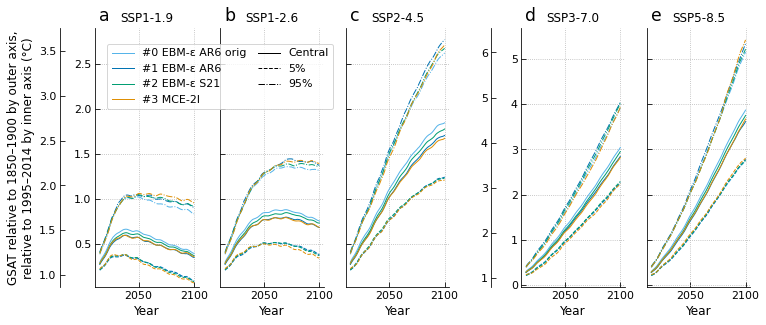

In [62]:
myplt.init_general(
    height=3.6, aspect=0.4, wspace=0.3,
    extend=[
        ('right', -1, {}),
        ('right', -1, {}),
        ('right', -1, {'xoff': 1.}),
        ('right', -1, {}),
    ],
)

for n, scenario in enumerate(scenario_order):
    ax = myplt(n)
    
    for q, ls in zip([0.5, 0.05, 0.95], ['-', '--', '-.']):
        df.loc[scenario, q].T[method_case_order].plot(
            ax=ax, color=map_color, ls=ls, legend=False,
        )

    ax.set_xlabel('Year')
    ax.set_title(map_scenario[scenario])
    ax.grid()

myplt.figure.legend(
    handles, labels,
    loc='upper left',
    bbox_to_anchor=myplt.get_fig_position_relto_axes((0.01, 0.96)),
    # labelspacing=0.1,
    ncol=2, columnspacing=1.,
)

for n in [1, 2, 4]:
    ax = myplt(n)
    ax.yaxis.set_ticklabels([])

myplt.axis_share(axis='y', axes=[0, 1, 2])
myplt.axis_share(axis='y', axes=[3, 4])
myplt.panel_label(xytext=(4, 3), ha='left')

for i, (ax, offset) in enumerate(zip(myplt(0, 3), [35, 30])):
    ax2 = myplt.make_twin(ax, 'left', offset=offset)
    ax2.set_ylim(*[y1 + gsat_1995to2014 for y1 in ax.get_ylim()])
    if i == 0:
        ax2.set_ylabel(
            'GSAT relative to 1850–1900 by outer axis,'
            '\nrelative to 1995–2014 by inner axis (°C)'
        )

# myplt.savefig('./picture/timeseries_gsat_ssp.png')
# myplt.savefig('./picture/timeseries_gsat_ssp.svg')

## Range plot: mid- and long-term GSAT changes

In [63]:
df = pd.concat([
    pd.concat({
        k: v.droplevel([0, 1], axis=1).loc[:, slc].mean(axis=1)
        for k, v in df_gsat.groupby(axis=1, level=[0, 1])
    }).to_frame('{}-{}'.format(slc.start, slc.stop))
    for slc in [
        slice(2041, 2060),
        slice(2081, 2100),
    ]
], axis=1)
df

2041-2060  2081-2100
ar6 ssp119 0     0.768091   0.501177
           1     0.507819   0.362577
           2     0.496097   0.393550
           3     0.434817   0.342466
           4     0.483874   0.304269
...                   ...        ...
s21 ssp585 595   1.605472   3.505754
           596   1.389320   3.168993
           597   1.669031   3.889878
           598   1.732946   3.884142
           599   1.322445   3.051468

[12000 rows x 2 columns]

In [64]:
dfq = pd.concat([
    df_ch4.loc[:, year].rename('{}-{}'.format(year, year+19))
    for year in [2041, 2081]
], axis=1).add(gsat_1995to2014).rename(map_qpoint_2, level=2)

dfq = pd.concat([
    dfq,
    df
    .add(gsat_1995to2014)
    .groupby(level=[0, 1])
    .quantile(qpoints)
    .rename(map_qpoint, level=2)
]).reorder_levels([1, 0, 2]).sort_index()
dfq

2041-2060  2081-2100
ssp119 Constrained CMIP6       central              1.572384   1.447940
                               very_likely__lower   1.179229   0.958968
                               very_likely__upper   1.962858   1.933505
       ECS-TCR mapped emulator central              1.556902   1.380680
                               likely__lower        1.422712   1.312441
...                                                      ...        ...
ssp585 s21                     central              2.331150   4.190963
                               likely__lower        2.090469   3.663117
                               likely__upper        2.666117   4.893877
                               very_likely__lower   1.956088   3.326914
                               very_likely__upper   2.893713   5.486581

[140 rows x 2 columns]

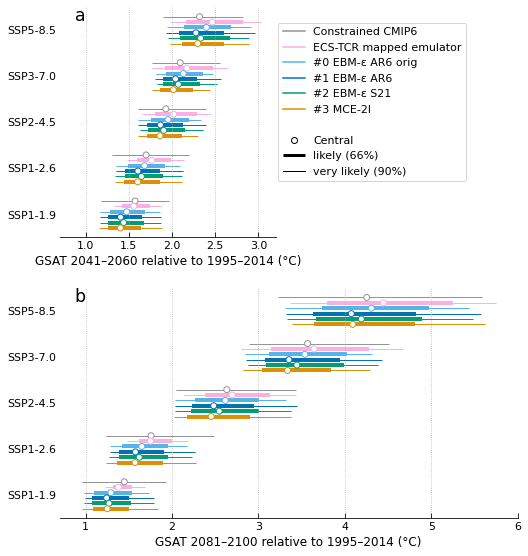

In [65]:
member_order = [
    'Constrained CMIP6',
    'ECS-TCR mapped emulator',
] + [
    map_method[k] for k in method_case_order
]

map_name_unit = {
    v: ('GSAT {} relative to 1995–2014'.format(v.replace('-', '–')), '°C')
    for v in dfq
}

height = 3.2
aspect = 1.5*2./height

xlim0 = (0.7, 3.2)
xlim1 = (0.7, 6.0)
aspect1 = aspect * (xlim1[1] - xlim1[0]) / (xlim0[1] - xlim0[0])

kw_space = {
    'height': height,
    'aspect': aspect,
    'extend': [
        ('bottom', -1, {'aspect': aspect1}),
    ]
}
plot_quantile_range(
    myplt,
    dfq.rename(map_scenario, level=0).rename(map_method, level=1),
    group_order=[map_scenario[k] for k in scenario_order[::-1]],
    member_order=member_order,
    map_color=map_color,
    kw_space=kw_space,
    map_name_unit=map_name_unit,
    kw_legend={
        'loc': 'upper right',
        'bbox_to_anchor': (0.9, 0.98),
    }
)

myplt(0).set_xlim(*xlim0)
myplt(1).set_xlim(*xlim1)

myplt.panel_label(va='top', xytext=(15, 0))

# myplt.savefig('./picture/range_gsat_ssp.png')
# myplt.savefig('./picture/range_gsat_ssp.svg')

## Range plot: forcing and response in 1995-2014

In [69]:
# Equilibrium response
df_eqres = pd.concat({
    k: v.droplevel(0, axis=1).div(df_parms['lamg'])
    for k, v in df_erf_1995to2014.groupby(level=0, axis=1)
}, axis=1)
df_eqres

erf                                 erf_co2                      \
          ar6  ar6_orig    mce-2l       s21       ar6  ar6_orig    mce-2l   
0    2.018919  1.783271  1.271327  1.338338  1.343872  1.177463  0.869368   
1    2.123417  1.313226  1.656383  1.348785  1.338338  0.880490  1.166088   
2    3.790243  1.883967  1.223787  1.559821  2.522750  1.400963  0.869461   
3    1.858572  1.217576  1.350296  1.619257  1.101598  0.849350  1.096463   
4    1.445909  1.859829  1.803860  1.477781  1.009009  1.113196  1.434905   
..        ...       ...       ...       ...       ...       ...       ...   
595  3.021593  1.539595  1.281122  1.584654  2.041483  0.992864  0.841880   
596  2.063344  1.642360  2.019213  1.482011  1.235253  1.248205  1.294066   
597  1.127456  1.524635  1.274530  2.061058  0.758679  1.092240  0.869064   
598  1.381571  1.247155  1.448047  2.558196  1.177886  0.866400  1.113350   
599  1.353330  1.582919  1.288263  1.599457  1.000533  0.957257  0.740247   

              erf_non-co2                                
          s21         ar6  ar6_orig    mce-2l       s21  
0    0.913893    0.675046  0.605808  0.401958  0.424445  
1    0.723429    0.785079  0.432736  0.490295  0.625356  
2    1.048918    1.267494  0.483003  0.354325  0.510903  
3    1.074820    0.756974  0.368226  0.253833  0.544437  
4    1.027045    0.436900  0.746633  0.368956  0.450736  
..        ...         ...       ...       ...       ...  
595  1.120208    0.980109  0.546731  0.439242  0.464446  
596  0.945279    0.828091  0.394154  0.725147  0.536732  
597  1.700492    0.368777  0.432395  0.405466  0.360566  
598  1.801821    0.203685  0.380755  0.334697  0.756375  
599  1.030040    0.352797  0.625662  0.548016  0.569417  

[600 rows x 12 columns]

In [70]:
# Realized warming fractions for typical conditions
aj = df_parms[['a0', 'a1']].rename(lambda x: x[-1], level=0, axis=1)
tauj = df_parms[['tau0', 'tau1']].rename(lambda x: x[-1], level=0, axis=1)
t70 = np.log(2.) / np.log(1.01)
df_rwf = pd.concat({
    'rwf_step_4':
    1. - (aj * np.exp(-4./tauj)).sum(level=1, axis=1),
    'rwf_ramp_70':
    1. - (aj * tauj * (1 - np.exp(-t70/tauj))).sum(level=1, axis=1) / t70,
}, axis=1)
df_rwf

rwf_step_4                               rwf_ramp_70                      \
           ar6  ar6_orig    mce-2l       s21         ar6  ar6_orig    mce-2l   
0     0.308105  0.380277  0.558179  0.467577    0.573186  0.580841  0.681816   
1     0.357561  0.485867  0.375772  0.445753    0.509242  0.783473  0.585867   
2     0.203288  0.327875  0.554465  0.397337    0.240382  0.514552  0.688768   
3     0.319412  0.491870  0.419590  0.437211    0.483582  0.689609  0.626160   
4     0.479288  0.347943  0.319784  0.403535    0.649151  0.499712  0.571573   
..         ...       ...       ...       ...         ...       ...       ...   
595   0.252951  0.411322  0.595566  0.384495    0.298228  0.656617  0.663471   
596   0.342021  0.418738  0.301872  0.479009    0.465564  0.580633  0.510208   
597   0.608107  0.466489  0.614347  0.273156    0.807788  0.639099  0.729363   
598   0.448843  0.528113  0.465645  0.238867    0.590683  0.767505  0.677030   
599   0.541556  0.404431  0.600280  0.405133    0.675879  0.609250  0.668216   

               
          s21  
0    0.695127  
1    0.630003  
2    0.598485  
3    0.664007  
4    0.714915  
..        ...  
595  0.605386  
596  0.723397  
597  0.449242  
598  0.404685  
599  0.590100  

[600 rows x 8 columns]

In [74]:
map_variable = {
    'erf': 'Total',
    'erf_co2': 'CO2',
    'erf_non-co2': 'Non-CO2',
    'rwf_ramp_70': 'Ramp 70 yrs',
    'rwf_step_4': 'Step 4 yrs',
}

In [75]:
dfq1 = (
    pd.concat([
        df.quantile(qpoints).stack([0, 1]).rename(k)
        for k, df in zip(
            ['ERF', 'ERF/lamg'],
            [df_erf_1995to2014, df_eqres],
        )
    ], axis=1)
    .reorder_levels([1, 2, 0])
    .rename(map_variable, level=0)
    .rename(map_method, level=1)
    .rename(map_qpoint, level=2)
    .sort_index()
)
dfq1

ERF  ERF/lamg
CO2     #0 EBM-ε AR6 orig central             1.549856  1.097904
                          likely__lower       1.442500  0.876345
                          likely__upper       1.647825  1.382814
                          very_likely__lower  1.364004  0.755405
                          very_likely__upper  1.720445  1.781384
        #1 EBM-ε AR6      central             1.564487  1.124606
                          likely__lower       1.365836  0.871950
                          likely__upper       1.795214  1.697154
                          very_likely__lower  1.211373  0.755441
                          very_likely__upper  2.007655  2.348042
        #2 EBM-ε S21      central             1.561870  1.099313
                          likely__lower       1.343504  0.884693
                          likely__upper       1.786390  1.459118
                          very_likely__lower  1.175295  0.723429
                          very_likely__upper  1.996392  1.952212
        #3 MCE-2l         central             1.302268  1.002376
                          likely__lower       1.111976  0.837299
                          likely__upper       1.552244  1.274774
                          very_likely__lower  1.000697  0.719779
                          very_likely__upper  1.789365  1.627153
Non-CO2 #0 EBM-ε AR6 orig central             0.581441  0.415118
                          likely__lower       0.362651  0.284926
                          likely__upper       0.865709  0.559588
                          very_likely__lower  0.219051  0.197439
                          very_likely__upper  1.087952  0.730242
        #1 EBM-ε AR6      central             0.682360  0.493546
                          likely__lower       0.455459  0.339151
                          likely__upper       0.929298  0.732459
                          very_likely__lower  0.263191  0.226288
                          very_likely__upper  1.109087  0.933518
        #2 EBM-ε S21      central             0.673157  0.475392
                          likely__lower       0.406025  0.324818
                          likely__upper       0.931591  0.622571
                          very_likely__lower  0.246746  0.200088
                          very_likely__upper  1.102456  0.768329
        #3 MCE-2l         central             0.626828  0.482706
                          likely__lower       0.396380  0.315843
                          likely__upper       0.844639  0.663446
                          very_likely__lower  0.233334  0.202410
                          very_likely__upper  1.000811  0.781385
Total   #0 EBM-ε AR6 orig central             2.147209  1.521485
                          likely__lower       1.907348  1.280366
                          likely__upper       2.395792  1.827534
                          very_likely__lower  1.761439  1.157219
                          very_likely__upper  2.612588  2.260117
        #1 EBM-ε AR6      central             2.251825  1.628358
                          likely__lower       1.918637  1.306543
                          likely__upper       2.633714  2.377615
                          very_likely__lower  1.723280  1.152197
                          very_likely__upper  2.860067  3.080574
        #2 EBM-ε S21      central             2.225618  1.559459
                          likely__lower       1.912762  1.320644
                          likely__upper       2.563085  1.962444
                          very_likely__lower  1.684411  1.185788
                          very_likely__upper  2.874444  2.521952
        #3 MCE-2l         central             1.958343  1.505072
                          likely__lower       1.688786  1.279600
                          likely__upper       2.219779  1.816635
                          very_likely__lower  1.471566  1.127340
                          very_likely__upper  2.498978  2.160766

In [76]:
dfq2 = (
    df_rwf
    .quantile(qpoints)
    .stack([0, 1])
    .reorder_levels([1, 2, 0])
    .rename(map_variable, level=0)
    .rename(map_method, level=1)
    .rename(map_qpoint, level=2)
    .sort_index()
)
dfq2

Ramp 70 yrs  #0 EBM-ε AR6 orig  central               0.636758
                                likely__lower         0.516196
                                likely__upper         0.726740
                                very_likely__lower    0.430679
                                very_likely__upper    0.783736
             #1 EBM-ε AR6       central               0.585598
                                likely__lower         0.409712
                                likely__upper         0.713961
                                very_likely__lower    0.300721
                                very_likely__upper    0.783277
             #2 EBM-ε S21       central               0.603328
                                likely__lower         0.507158
                                likely__upper         0.698290
                                very_likely__lower    0.404657
                                very_likely__upper    0.752948
             #3 MCE-2l          central               0

In [83]:
d1 = df_erf_ch4.loc[:, 1995:2014].mean(axis=1).drop_duplicates().droplevel(1)
d1

erf            1.873524
erf_co2        1.555528
erf_non-co2    0.317996
dtype: float64

In [84]:
method = 'ECS-TCR mapped emulator'

dfq1_add = (
    pd.concat({
        ('ERF', method):
        pd.DataFrame(
            d1.values + np.zeros((len(df_parms_ch4), 1)),
            index=df_parms_ch4.index, columns=d1.index,
        ),
        ('ERF/lamg', method):
        pd.DataFrame(
            d1.values / df_parms_ch4['lamg'].values[:, None],
            index=df_parms_ch4.index, columns=d1.index,
        ),
    })
    .stack()
    .unstack(0)
    .reorder_levels([2, 0, 1])
    .rename(map_variable, level=0)
    .rename(map_qpoint_2, level=2)
    .sort_index()
)
dfq1_add

ERF  ERF/lamg
CO2     ECS-TCR mapped emulator central             1.555528  1.166646
                                likely__lower       1.555528  0.972205
                                likely__upper       1.555528  1.555528
                                very_likely__lower  1.555528  0.777764
                                very_likely__upper  1.555528  1.944410
Non-CO2 ECS-TCR mapped emulator central             0.317996  0.238497
                                likely__lower       0.317996  0.198747
                                likely__upper       0.317996  0.317996
                                very_likely__lower  0.317996  0.158998
                                very_likely__upper  0.317996  0.397495
Total   ECS-TCR mapped emulator central             1.873524  1.405143
                                likely__lower       1.873524  1.170952
                                likely__upper       1.873524  1.873524
                                very_likely__lower  1.873524  0.936762
                                very_likely__upper  1.873524  2.341905

In [85]:
dfq2_add = (
    pd.concat({method: df_parms_ch4[['rwf_step_4', 'rwf_ramp_70']].stack()})
    .reorder_levels([2, 0, 1])
    .rename(map_variable, level=0)
    .rename(map_qpoint_2, level=2)
    .sort_index()
)
dfq2_add

Ramp 70 yrs  ECS-TCR mapped emulator  central               0.609743
                                      likely__lower         0.593872
                                      likely__upper         0.553787
                                      very_likely__lower    0.637590
                                      very_likely__upper    0.486816
Step 4 yrs   ECS-TCR mapped emulator  central               0.440954
                                      likely__lower         0.459427
                                      likely__upper         0.364197
                                      very_likely__lower    0.519584
                                      very_likely__upper    0.302531
dtype: float64

In [86]:
member_order = [method] + [
    map_method[k]
    for k in method_case_order
]

In [87]:
def plot_range_1(ax, din, group_order, member_order, map_color, **kw):
    midx = pd.MultiIndex.from_product([group_order, member_order])
    ngroups = len(group_order)
    nmembers = len(member_order)
    colors = [map_color[member] for member in member_order] * ngroups

    shrink = kw.get('shrink', 0.7)
    yvals = np.arange(ngroups * nmembers)[::-1].reshape((-1, nmembers)) + 0.5
    ym = yvals.mean(axis=1)
    yvals = ((yvals - ym[:, None]) * shrink + ym[:, None]).ravel()

    names = ['Group', 'Member', 'Quantile']
    din = din.rename_axis(names)
    df = din.unstack('Quantile').reindex(midx)
    ax.hlines(
        yvals, df['very_likely__lower'], df['very_likely__upper'],
        color=colors, lw=1., zorder=1,
    )
    ax.hlines(
        yvals, df['likely__lower'], df['likely__upper'],
        color=colors, lw=4., zorder=1,
    )
    ax.scatter(
        df['central'], yvals,
        marker='o', facecolor='w', edgecolors=colors,
    )
    ax.set_yticks(ym)
    ax.set_yticklabels(group_order)
    ax.tick_params(axis='y', labelleft=True, left=False)
    ax.set_ylim(0, ngroups*nmembers)
    ax.spines['left'].set_visible(False)
    ax.grid(axis='x')

[2024-06-26 09:45:29 mce.util] INFO:saved to ./picture/range_forcing_1995-2014.png
[2024-06-26 09:45:29 mce.util] INFO:saved to ./picture/range_forcing_1995-2014.svg


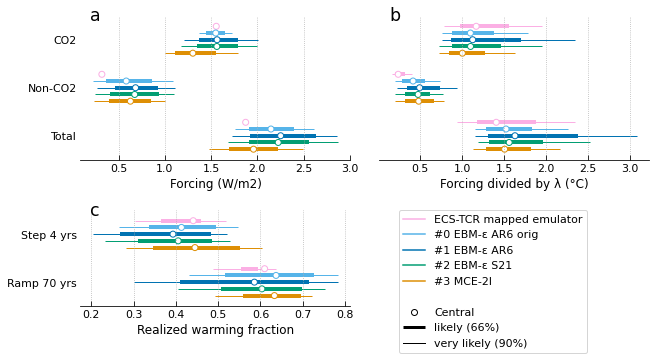

In [89]:
height_ref = 1.5
width = height_ref * 2.5

height = 2.0
kw_space = {
    'height': height,
    'aspect': width/height,
    'wspace': 0.4,
    'extend': [
        ('right', -1, {}),
        ('bottom', 0,
         {'height': height*(2./3.), 'aspect': width/height*(3./2.)}),
    ],
}

map_name_unit = {
    'ERF': ('Forcing', 'W/m2'),
    'ERF/lamg': ('Forcing divided by λ', '°C'),
}

plot_quantile_range(
    myplt,
    pd.concat([dfq1, dfq1_add]),
    member_order=member_order,
    map_color=map_color,
    kw_space=kw_space,
    map_name_unit=map_name_unit,
    kw_legend={'loc': 'upper left', 'bbox_to_anchor': (0.55, 0.35)},
)
ax = myplt(1)
ax.yaxis.set_ticklabels([])

ax = myplt(2)
plot_range_1(
    ax,
    pd.concat([dfq2, dfq2_add]),
    ['Step 4 yrs', 'Ramp 70 yrs'],
    member_order,
    map_color,
)
ax.set_xlabel('Realized warming fraction')

myplt.panel_label(va='center', xytext=(10, 0))

myplt.savefig('./picture/range_forcing_1995-2014.png')
myplt.savefig('./picture/range_forcing_1995-2014.svg')

## Range plot: forcing and response in 2081-2100

In [91]:
df_erf_2081to2100

erf                                                               \
          ar6                                           ar6_orig             
       ssp119    ssp126    ssp245    ssp370     ssp585    ssp119    ssp126   
0    1.885509  2.494546  4.255897  6.186256   7.434663  2.439046  3.237837   
1    2.672037  3.483297  5.852307  8.470225  10.121171  2.469954  3.237400   
2    2.988119  3.903516  6.462919  9.350062  11.213078  2.452126  3.197981   
3    2.103161  2.745871  4.691588  6.767170   8.056739  2.348708  3.065387   
4    2.790322  3.601620  6.026941  8.315090  10.331549  2.061124  2.726599   
..        ...       ...       ...       ...        ...       ...       ...   
595  2.750766  3.651969  6.159068  9.088688  10.756114  2.418020  3.138965   
596  2.379081  3.152042  5.373957  7.991450   9.351825  2.581185  3.389124   
597  2.465262  3.196947  5.315919  7.393780   9.134567  2.570811  3.403129   
598  3.334129  4.343942  7.075886  9.774154  12.162720  2.605271  3.430044   
599  2.564752  3.337067  5.672550  7.696853   9.692538  2.232123  2.859885   

                                   ... erf_non-co2                      \
                                   ...      mce-2l                       
       ssp245    ssp370    ssp585  ...      ssp119    ssp126    ssp245   
0    5.471702  8.217222  9.672538  ...    0.515098  0.570835  1.160189   
1    5.406494  7.784198  9.416479  ...    0.478330  0.553735  1.094797   
2    5.333384  7.491606  9.259241  ...    0.389595  0.467161  1.122664   
3    5.040461  7.100624  8.786486  ...    0.301151  0.381825  0.990686   
4    4.640286  6.954781  8.145917  ...    0.558428  0.614831  1.129891   
..        ...       ...       ...  ...         ...       ...       ...   
595  5.279075  7.486300  9.031351  ...    0.377966  0.434920  1.022560   
596  5.677791  7.781912  9.810733  ...    0.313440  0.391588  0.974141   
597  5.673121  8.042430  9.870652  ...    0.477638  0.547295  1.277080   
598  5.663325  8.079040  9.765092  ...    0.421287  0.511104  1.215994   
599  4.772671  6.769301  8.258958  ...    0.364783  0.434827  1.075874   

                                                                           
                              s21                                          
       ssp370    ssp585    ssp119    ssp126    ssp245    ssp370    ssp585  
0    1.481019  1.831197  0.287126  0.347767  0.861562  1.512956  1.484347  
1    1.712381  1.885438  0.494860  0.536538  1.117159  1.955112  1.802488  
2    1.408263  1.734082  0.415354  0.488116  1.098086  1.811735  1.790736  
3    1.211851  1.649399  0.464076  0.542458  1.224402  1.812878  1.964268  
4    1.296385  1.796055  0.468707  0.542106  0.963784  1.488799  1.641350  
..        ...       ...       ...       ...       ...       ...       ...  
595  1.665624  1.765205  0.541599  0.607247  1.198623  1.853374  1.990317  
596  1.562353  1.585076  0.345255  0.444903  1.206266  2.101855  1.935019  
597  2.006635  2.094923  0.311641  0.393676  0.976465  1.284506  1.608216  
598  1.661363  1.923485  0.486377  0.537148  1.051774  1.547241  1.744247  
599  1.643260  1.801358  0.421067  0.481651  1.052530  1.678927  1.730403  

[600 rows x 60 columns]

In [97]:
# Equilibrium response
df_eqres = pd.concat({
    k: v.droplevel([0, 2], axis=1).div(df_parms['lamg'])
    for k, v in df_erf_2081to2100.groupby(level=[0, 2], axis=1)
}, axis=1).reorder_levels([0, 2, 1], axis=1).sort_index(axis=1)
df_eqres

erf                                                                \
          ar6                                            ar6_orig             
       ssp119    ssp126    ssp245     ssp370     ssp585    ssp119    ssp126   
0    2.082716  2.755453  4.701025   6.833282   8.212261  1.783097  2.367063   
1    2.102422  2.740741  4.604734   6.664574   7.963578  1.384484  1.814661   
2    3.980686  5.200151  8.609713  12.455883  14.937738  2.231624  2.910410   
3    1.767732  2.307937  3.943334   5.687885   6.771782  1.348032  1.759368   
4    1.607845  2.075333  3.472857   4.791339   5.953267  1.704200  2.254435   
..        ...       ...       ...        ...        ...       ...       ...   
595  3.043555  4.040681  6.814633  10.056079  11.900985  1.646011  2.136777   
596  1.882924  2.494684  4.253219   6.324834   7.401503  1.935105  2.540814   
597  1.228149  1.592661  2.648295   3.683448   4.550677  1.659584  2.196886   
598  1.843266  2.401539  3.911888   5.403620   6.724133  1.365328  1.797561   
599  1.590842  2.069887  3.518520   4.774137   6.012003  1.629649  2.087971   

                                   ... erf_non-co2                      \
                                   ...      mce-2l                       
       ssp245    ssp370    ssp585  ...      ssp119    ssp126    ssp245   
0    4.000159  6.007308  7.071236  ...    0.313948  0.347919  0.707126   
1    3.030505  4.363280  5.278224  ...    0.486736  0.563465  1.114036   
2    4.853793  6.817942  8.426627  ...    0.242296  0.290535  0.698204   
3    2.892955  4.075378  5.042973  ...    0.252125  0.319666  0.829407   
4    3.836731  5.750426  6.735294  ...    0.541348  0.596027  1.095334   
..        ...       ...       ...  ...         ...       ...       ...   
595  3.593607  5.096124  6.147881  ...    0.229098  0.263620  0.619808   
596  4.256620  5.834072  7.355072  ...    0.425023  0.530992  1.320932   
597  3.662276  5.191781  6.371987  ...    0.217228  0.248908  0.580812   
598  2.967943  4.233932  5.117530  ...    0.315557  0.382834  0.910819   
599  3.484475  4.942193  6.029776  ...    0.262154  0.312491  0.773184   

                                                                           
                              s21                                          
       ssp370    ssp585    ssp119    ssp126    ssp245    ssp370    ssp585  
0    0.902669  1.116100  0.183085  0.221752  0.549371  0.964730  0.946487  
1    1.742473  1.918571  0.266088  0.288498  0.600699  1.051269  0.969203  
2    0.875824  1.078456  0.288033  0.338491  0.761483  1.256373  1.241811  
3    1.014567  1.380884  0.276887  0.323653  0.730529  1.081639  1.171964  
4    1.256735  1.741123  0.353486  0.408842  0.726859  1.122811  1.237861  
..        ...       ...       ...       ...       ...       ...       ...  
595  1.009591  1.069950  0.389723  0.436961  0.862503  1.333647  1.432188  
596  2.118546  2.149359  0.177884  0.229225  0.621497  1.082926  0.996968  
597  0.912610  0.952764  0.298025  0.376476  0.933802  1.228384  1.537951  
598  1.244415  1.440753  0.639987  0.706793  1.383951  2.035898  2.295124  
599  1.180940  1.294558  0.289571  0.331235  0.723834  1.154612  1.190012  

[600 rows x 60 columns]

In [112]:
dfq = (
    pd.concat({
        k: df.quantile(qpoints).stack(level=[1, 2])
        for k, df in zip(
            ['ERF', 'ERF/lamg'],
            [df_erf_2081to2100, df_eqres],
        )
    }, axis=1)
    .reorder_levels([2, 1, 0])
    .rename(map_scenario, level=0)
    .rename(map_method, level=1)
    .rename(map_qpoint, level=2)
    .sort_index()
    .rename(map_variable, level=1, axis=1)
)
dfq

ERF                      \
                                                   Total       CO2   Non-CO2   
SSP1-1.9 #0 EBM-ε AR6 orig central              2.411796  1.959215  0.449446   
                           likely__lower        2.251904  1.823504  0.359840   
                           likely__upper        2.572756  2.083061  0.552661   
                           very_likely__lower   2.136081  1.724275  0.282656   
                           very_likely__upper   2.672833  2.174863  0.631568   
...                                                  ...       ...       ...   
SSP5-8.5 #3 MCE-2l         central              8.090103  6.335448  1.828286   
                           likely__lower        7.294580  5.434829  1.605321   
                           likely__upper        9.084945  7.320471  1.990652   
                           very_likely__lower   6.686305  4.897818  1.477806   
                           very_likely__upper  10.083050  8.258071  2.139022   

                                                ERF/lamg                      
                                                   Total       CO2   Non-CO2  
SSP1-1.9 #0 EBM-ε AR6 orig central              1.694188  1.387890  0.315709  
                           likely__lower        1.377005  1.107811  0.232204  
                           likely__upper        2.150428  1.748054  0.446525  
                           very_likely__lower   1.180261  0.954928  0.175152  
                           very_likely__upper   2.809490  2.251897  0.591694  
...                                                  ...       ...       ...  
SSP5-8.5 #3 MCE-2l         central              6.132719  4.751550  1.379214  
                           likely__lower        5.114935  3.981067  1.091621  
                           likely__upper        7.880039  6.124048  1.815286  
                           very_likely__lower   4.616255  3.545933  0.895890  
                           very_likely__upper  10.657634  8.332228  2.382972  

[100 rows x 6 columns]

In [123]:
d1 = df_erf_ch4.loc[:, 2081:2100].mean(axis=1)
d1

erf          ssp119    2.392135
             ssp126    3.153487
             ssp245    5.225013
             ssp370    7.401665
             ssp585    9.126088
erf_co2      ssp119    1.939505
             ssp126    2.628612
             ssp245    4.205229
             ssp370    5.929550
             ssp585    7.433428
erf_non-co2  ssp119    0.452630
             ssp126    0.524875
             ssp245    1.019784
             ssp370    1.472115
             ssp585    1.692660
dtype: float64

In [136]:
dfq_add = (
    pd.concat({
        ('ERF', method):
        pd.DataFrame(
            d1.values + np.zeros((len(df_parms_ch4), 1)),
            index=df_parms_ch4.index, columns=d1.index,
        ),
        ('ERF/lamg', method):
        pd.DataFrame(
            d1.values / df_parms_ch4['lamg'].values[:, None],
            index=df_parms_ch4.index, columns=d1.index,
        ),
    }, axis=1).stack([1, 3])
    .reorder_levels([2, 1, 0])
    .rename(map_scenario, level=0)
    .rename(map_qpoint_2, level=2)
    .sort_index()
    .rename(map_variable, level=1, axis=1)
)
dfq_add

ERF            \
                                                        Total       CO2   
SSP1-1.9 ECS-TCR mapped emulator central             2.392135  1.939505   
                                 likely__lower       2.392135  1.939505   
                                 likely__upper       2.392135  1.939505   
                                 very_likely__lower  2.392135  1.939505   
                                 very_likely__upper  2.392135  1.939505   
SSP1-2.6 ECS-TCR mapped emulator central             3.153487  2.628612   
                                 likely__lower       3.153487  2.628612   
                                 likely__upper       3.153487  2.628612   
                                 very_likely__lower  3.153487  2.628612   
                                 very_likely__upper  3.153487  2.628612   
SSP2-4.5 ECS-TCR mapped emulator central             5.225013  4.205229   
                                 likely__lower       5.225013  4.205229   
                                 likely__upper       5.225013  4.205229   
                                 very_likely__lower  5.225013  4.205229   
                                 very_likely__upper  5.225013  4.205229   
SSP3-7.0 ECS-TCR mapped emulator central             7.401665  5.929550   
                                 likely__lower       7.401665  5.929550   
                                 likely__upper       7.401665  5.929550   
                                 very_likely__lower  7.401665  5.929550   
                                 very_likely__upper  7.401665  5.929550   
SSP5-8.5 ECS-TCR mapped emulator central             9.126088  7.433428   
                                 likely__lower       9.126088  7.433428   
                                 likely__upper       9.126088  7.433428   
                                 very_likely__lower  9.126088  7.433428   
                                 very_likely__upper  9.126088  7.433428   

                                                                ERF/lamg  \
                                                      Non-CO2      Total   
SSP1-1.9 ECS-TCR mapped emulator central             0.452630   1.794101   
                                 likely__lower       0.452630   1.495084   
                                 likely__upper       0.452630   2.392135   
                                 very_likely__lower  0.452630   1.196068   
                                 very_likely__upper  0.452630   2.990169   
SSP1-2.6 ECS-TCR mapped emulator central             0.524875   2.365115   
                                 likely__lower       0.524875   1.970929   
                                 likely__upper       0.524875   3.153487   
                                 very_likely__lower  0.524875   1.576744   
                                 very_likely__upper  0.524875   3.941859   
SSP2-4.5 ECS-TCR mapped emulator central             1.019784   3.918760   
                                 likely__lower       1.019784   3.265633   
                                 likely__upper       1.019784   5.225013   
                                 very_likely__lower  1.019784   2.612507   
                                 very_likely__upper  1.019784   6.531266   
SSP3-7.0 ECS-TCR mapped emulator central             1.472115   5.551248   
                                 likely__lower       1.472115   4.626040   
                                 likely__upper       1.472115   7.401665   
                                 very_likely__lower  1.472115   3.700832   
                                 very_likely__upper  1.472115   9.252081   
SSP5-8.5 ECS-TCR mapped emulator central             1.692660   6.844566   
                                 likely__lower       1.692660   5.703805   
                                 likely__upper       1.692660   9.126088   
                                 very_likely__lower  1.692660   4.563044   
                                 very_likely__upper  1.6

In [140]:
map_name_unit

{'ERF': ('Forcing', 'W/m2'), 'ERF/lamg': ('Forcing divided by λ', '°C')}

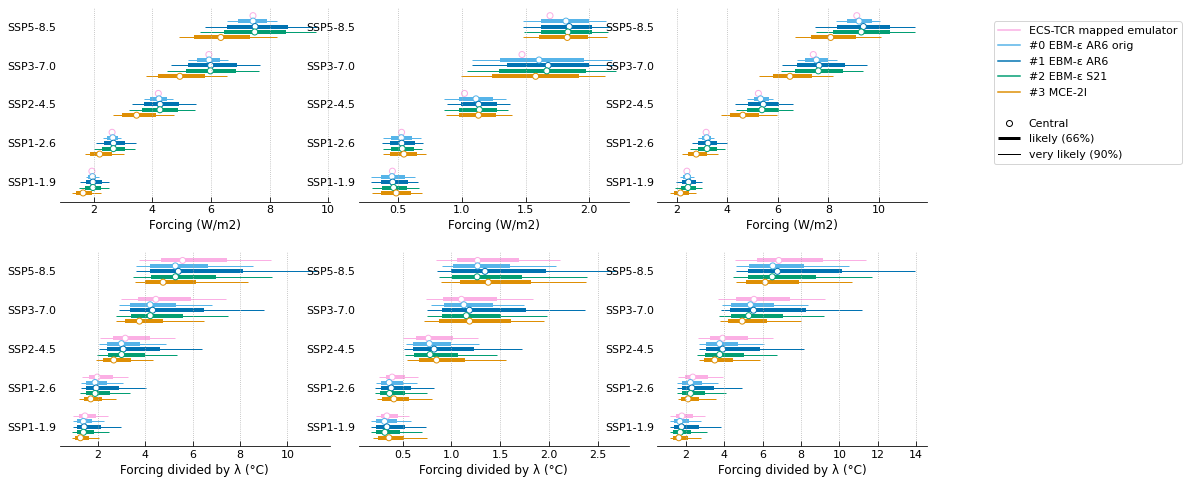

In [149]:
height = 2.7
kw_space = {'height': height, 'aspect': width/height, 'wspace': 0.4}

parm_order = [
    ('ERF', 'CO2'),
    ('ERF', 'Non-CO2'),
    ('ERF', 'Total'),
    ('ERF/lamg', 'CO2'),
    ('ERF/lamg', 'Non-CO2'),
    ('ERF/lamg', 'Total'),
]

plot_quantile_range(
    myplt,
    pd.concat([dfq, dfq_add]),
    parm_order=parm_order,
    member_order=member_order,
    group_order=[map_scenario[k] for k in scenario_order[::-1]],
    map_color=map_color,
    col=3,
    kw_space=kw_space,
    map_name_unit=map_name_unit,
)
for i, ax in enumerate(myplt()):
    ax.set_xlabel(
        '{} ({})'.format(
            *map_name_unit[eval(ax.get_xlabel())[0]],
        )
    )